In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import numpy as np
import pyvista as pv
from pyvista import QtInteractor

# Enable notebook plotting
pv.set_plot_theme("document")  # optional, makes colors nicer
#pv.start_xvfb()  # only needed if running headless

# ---------------------------------------------------------------------
# Load states
# ---------------------------------------------------------------------
filepath = "/export/home/jalegria/Thesis/jf1uids/corrector_src/data/states/ground_truth_100.npy"
states = np.load(filepath)

n_states = states.shape[0]
rho = states[-1, 0]
n = rho.shape[-1]

vmin, vmax = float(rho.min()), float(rho.max())
center = np.array([n/2, n/2, n/2])
print(f"Density range: {vmin:.3e} – {vmax:.3e}")

# ---------------------------------------------------------------------
# Create PyVista grid
# ---------------------------------------------------------------------
grid = pv.ImageData()
grid.dimensions = rho.shape
grid.spacing = (1.0, 1.0, 1.0)
grid.origin = (0, 0, 0)
grid["density"] = rho.flatten(order="F")

Density range: 1.336e-01 – 2.098e+00


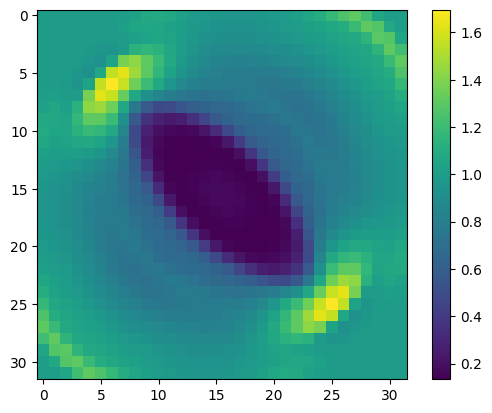

In [5]:
import matplotlib.pyplot as plt
plt.imshow(rho[:,:, 16])
plt.colorbar()

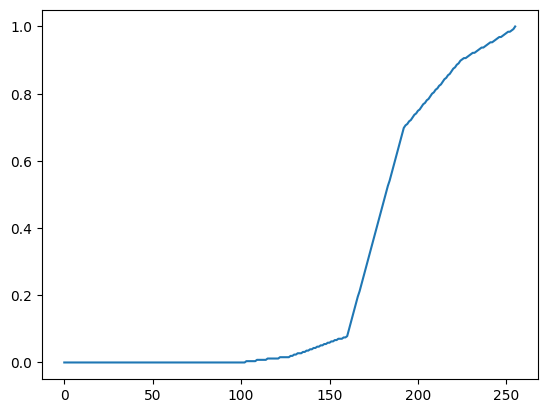

In [22]:
opacity = [0, 0.0, 0.0, 0.0, 0.02, 0.08, 0.7, 0.9, 1.0]
tf = pv.opacity_transfer_function(opacity, 256, interpolate=True).astype(float) / 255.0

plt.plot(tf)

2025-10-19 17:26:42.609 (  88.391s) [    7B56CC7B0740]vtkXOpenGLRenderWindow.:1458  WARN| bad X server connection. DISPLAY=
/export/home/jalegria/miniconda3/envs/thesis_2/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


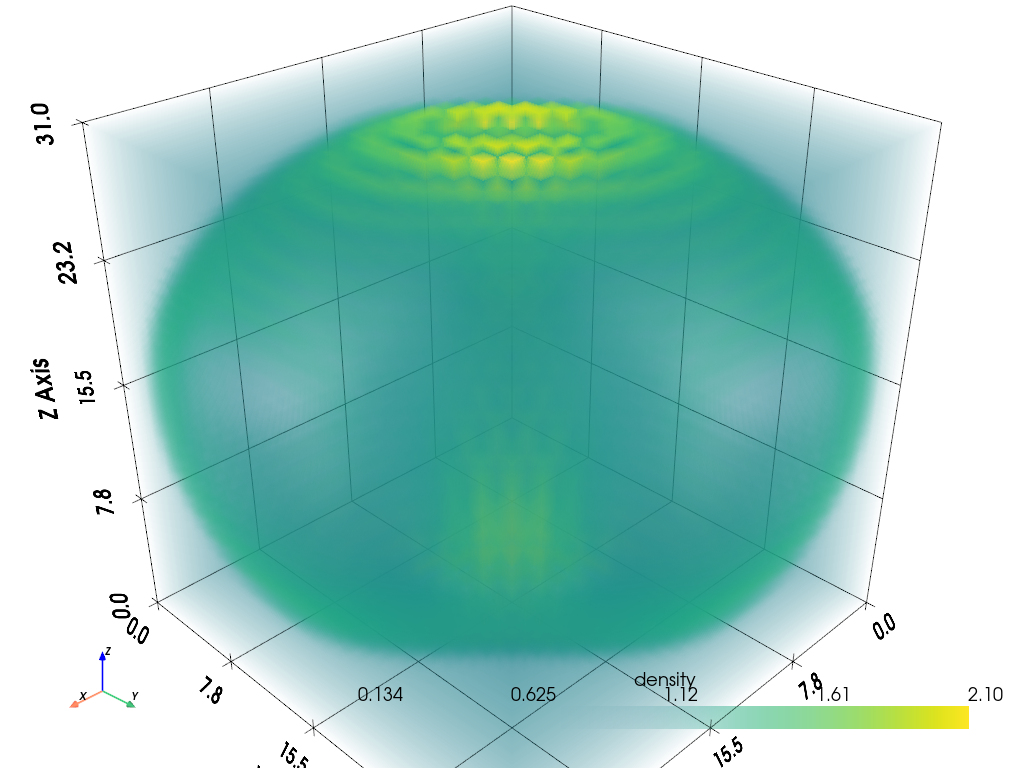

In [4]:
# ---------------------------------------------------------------------
# Plotter
# ---------------------------------------------------------------------
plotter = pv.Plotter(notebook=True)
# opacity = np.linspace(0.0, 1.0, 20)
opacity = [0, 0.0, 0.0, 0.03, 0.2, 0.5, 0.7, 0.9, 1.0]
vol_actor = plotter.add_volume(
    grid,
    scalars="density",
    cmap="viridis",
    clim=[vmin, vmax],
    opacity=opacity,  # start simple
    # opacity_unit_distance=1.0
)

plotter.add_axes()
plotter.show_grid()
radius = 80.0  # distance from center
azimuth = 45.0  # degrees around Z
elevation = 30.0  # degrees up from XY plane

# Convert spherical coordinates to Cartesian
theta = np.radians(azimuth)
phi = np.radians(elevation)
camera_position = (
    center[0] + radius * np.cos(phi) * np.cos(theta),
    center[1] + radius * np.cos(phi) * np.sin(theta),
    center[2] + radius * np.sin(phi),
)

plotter.camera_position = [camera_position, tuple(center), (0, 0, 1)]
plotter.show()
